<a href="https://colab.research.google.com/github/Saroramath/MachineLearning/blob/main/6205A1Q1Start_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io
import numpy as np


## Importing the data

In [4]:
uploaded = files.upload()    #upload the file "StartUpProfits.csv". You can find the file in Data example folder. 

Saving StartUpProfits.csv to StartUpProfits.csv


In [5]:
df = pd.read_csv(io.StringIO(uploaded['StartUpProfits.csv'].decode('utf-8')))



---



## Knowing the data

In [6]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


* **The data has 50 samples with no null values. It does not necessarily means that data is complete. Sometimes non-availabilty of data could have been marked as zero.**




* **We next find the number of values marked zero in the data.**

In [8]:
print(np.count_nonzero(df==0)) # number of zero values in the data.

5


In [9]:
df.State.unique() # number of unique states in the categorical data of State.

array(['New York', 'California', 'Florida'], dtype=object)



---



## Visualizing the data

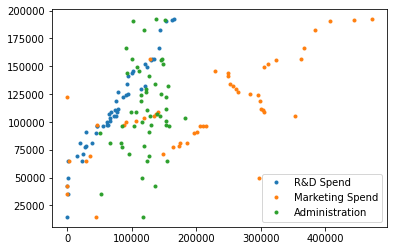

In [10]:
plt.plot(df['R&D Spend'], df.Profit,'.',label = "R&D Spend")
plt.plot(df['Marketing Spend'], df.Profit,'.', label
         = "Marketing Spend")
plt.plot(df.Administration, df.Profit,'.',label="Administration")
plt.legend()

* **Both R&D spending and Marketing spending shows positive corelation with 
Profits, with R&D spending having higher coefficient. The administartive cost seems to have no direct corelation with Profits.**
* **We can further see that with a corelation heat map.**

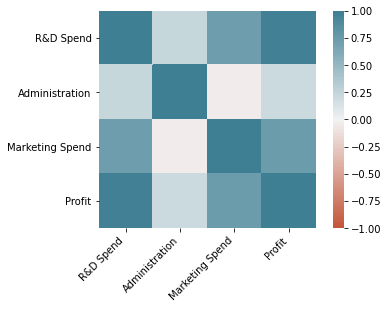

In [11]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



---



## Preparing the data 

We first rename the colums for easier analysis.

In [12]:
df = df.rename(columns = {'R&D Spend':'RD'})
df = df.rename(columns = {'Marketing Spend':'Marketing'}) #Rename the columns for easier analysis later.

*  There are **five** places with missing data. We will **drop** those data values from our analysis. We tried for the sake of learning, a k-nearest neighbourhood regression to fill the missing data. Those are not so significant for the present problem so we have skipped the details here.

In [13]:
columns = df.columns.tolist()
columns.remove('State')
columns

['RD', 'Administration', 'Marketing', 'Profit']

In [14]:
for col in columns:
          df = df.loc[lambda df: df[col] > 0, :]   #Drop the zero values.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 46
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RD              46 non-null     float64
 1   Administration  46 non-null     float64
 2   Marketing       46 non-null     float64
 3   State           46 non-null     object 
 4   Profit          46 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.2+ KB


So now we have **46** data instances of comlete data to do an analysis.



---



**Since there are only three different States. We will encode the State data into numerical data as vectors**



In [16]:
df_encode = pd.get_dummies(df['State'], prefix='State') #encode the States into vectors

In [17]:
df_encode.head(3)

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0


Now we will join the encoded data to our orginal dataframe.

In [18]:
df = pd.concat([df,df_encode], axis=1) #Join the encoded data and drop the State
df = df.drop(columns='State')

In [19]:
df.head(3)

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 46
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RD                46 non-null     float64
 1   Administration    46 non-null     float64
 2   Marketing         46 non-null     float64
 3   Profit            46 non-null     float64
 4   State_California  46 non-null     uint8  
 5   State_Florida     46 non-null     uint8  
 6   State_New York    46 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.9 KB


## Modelling and predicting the data

**We will apply linear regression model for the dataset**

In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

We split the data to use 80% for training our model and 20% to use for testing it.

In [22]:
 df_train, df_test= train_test_split( df, test_size = 0.2, random_state = 1) #Split the data to use 80% for training the model and 20% to test it.

**We select the features to train the model on.**

In [23]:
features = (df.columns.tolist())
features.remove('Profit')

In [24]:
features

['RD',
 'Administration',
 'Marketing',
 'State_California',
 'State_Florida',
 'State_New York']

In [25]:
linear_regression = linear_model.LinearRegression()

In [26]:
linear_regression.fit(df_train[features], df_train['Profit'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We predict the values on the test data with our model.

In [28]:
df_predictedProfit = linear_regression.predict(df_test[features])

We can check how good our model is with the Mean Square error and the r^2 score.

In [29]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(df_test['Profit'], df_predictedProfit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(df_test['Profit'], df_predictedProfit))

Mean squared error: 53513586.87
Coefficient of determination: 0.96
